Loading dataset...
Previewing the dataset:
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  
Starting preprocessing...
Handling missing values...
Balancing

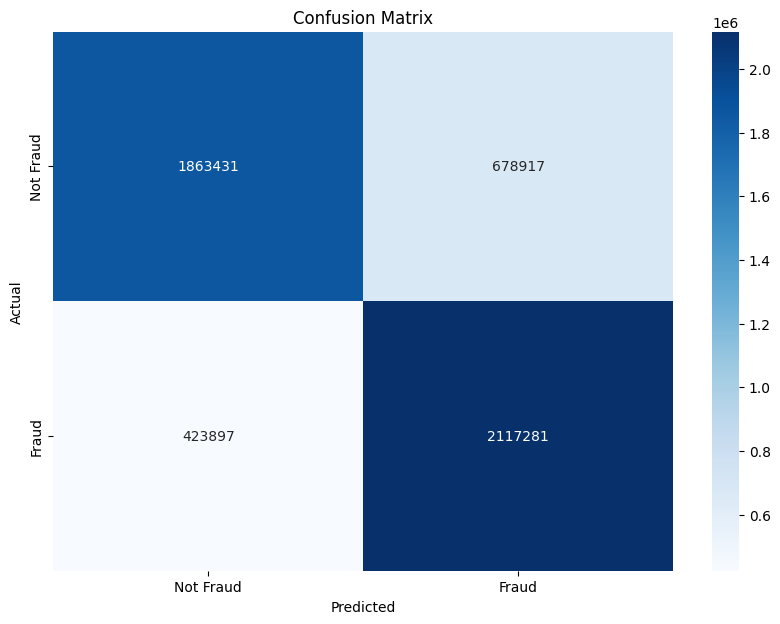

Saving the model to a file...
Model saved successfully.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
print("Loading dataset...")
df = pd.read_csv('/content/drive/MyDrive/Fraud.csv')  # Update the file path accordingly

# Preview the dataset
print("Previewing the dataset:")
print(df.head())

# Preprocessing
print("Starting preprocessing...")

# Convert categorical features into numeric
df['type'] = LabelEncoder().fit_transform(df['type'])
df['nameOrig'] = LabelEncoder().fit_transform(df['nameOrig'])
df['nameDest'] = LabelEncoder().fit_transform(df['nameDest'])

# Handle missing values
print("Handling missing values...")
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Features and target variable
X = df_imputed.drop(columns=['isFraud', 'isFlaggedFraud'])
y = df_imputed['isFraud']

# Scaling features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Balance the dataset using SMOTE
print("Balancing the dataset...")
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

# Save the preprocessed data
preprocessed_df = pd.DataFrame(X_balanced, columns=X.columns)
preprocessed_df['isFraud'] = y_balanced
preprocessed_df.to_csv('preprocessed_data_balanced.csv', index=False)
print("Preprocessed balanced data saved to 'preprocessed_data_balanced.csv'")

# Split the dataset into training and testing sets
print("Splitting the dataset into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.4, random_state=75)

# Train a Naive Bayes model
print("Training the Naive Bayes model...")
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

# Evaluate the model
print("Calculating precision, recall, F1 score, and confusion matrix for the model...")
y_pred = naive_bayes.predict(X_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

# Plot confusion matrix
print("Plotting confusion matrix...")
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save the model to a file
print("Saving the model to a file...")
with open('naive_bayes_model.pkl', 'wb') as f:
    pickle.dump(naive_bayes, f)

print("Model saved successfully.")
